In [3]:
import ctd
import pandas as pd

# science stack
import numpy as np
from scipy import interpolate

import seawater as sw
# Visual Stack

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


### Load Seabird CTD Calibration Cast

In [4]:
f = '/Users/bell/ecoraid/2021/CTDcasts/dy2103/rawconverted/ctd007.cnv'

In [5]:
ctd_df = ctd.from_cnv(f)

In [6]:
ctd_df.describe()

,c0mS/cm,c1mS/cm,flECO-AFL,sbeox0V,t090C,t190C,timeS,sbeox1V,par,turbWETntu0,...,sal11,sigma-t00,sigma-t11,sbeox0ML/L,sbox0Mm/Kg,sbeox0PS,sbeox1ML/L,sbox1Mm/Kg,sbeox1PS,nbin
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,29.078623,29.078578,0.161991,2.087185,2.671717,2.671677,130.974154,2.410443,9.558661,1.467617,...,32.165763,25.650192,25.650165,7.558008,329.099231,99.049185,7.403662,322.378462,97.026492,35.261538
std,0.085409,0.087021,0.240286,0.013042,0.113918,0.113974,53.748045,0.017092,20.231411,0.551851,...,0.010436,0.009489,0.011759,0.021037,0.918788,0.553493,0.028370,1.236905,0.617971,13.523448
min,28.972312,28.907922,-0.076100,2.067200,2.529100,2.529000,66.236000,2.380500,0.200950,0.044900,...,32.083900,25.638600,25.596200,7.524000,327.616000,98.255000,7.351700,320.113000,95.975000,2.000000
25%,28.976242,28.979038,-0.022500,2.072900,2.538100,2.537900,95.322000,2.394000,0.229150,1.068300,...,32.166500,25.640500,25.641200,7.536800,328.174000,98.437000,7.381500,321.411000,96.493000,24.000000
50%,29.092482,29.093183,0.071400,2.090300,2.689000,2.688900,125.110000,2.413600,0.703010,1.650800,...,32.166700,25.648600,25.647900,7.558000,329.098000,99.162000,7.402500,322.333000,97.133000,35.000000
75%,29.166248,29.167891,0.356900,2.100100,2.788500,2.788200,156.153000,2.428000,6.309900,1.901300,...,32.167300,25.661300,25.661600,7.577700,329.958000,99.613000,7.431800,323.607000,97.630000,47.000000
max,29.184655,29.185598,0.738300,2.103600,2.813900,2.813900,386.425000,2.433000,93.010000,2.084700,...,32.178900,25.662500,25.672000,7.588800,330.445000,99.787000,7.448000,324.309000,97.893000,72.000000


### Load Prawler Profile

Wetlabs needs a linear transformation from counts to sci-units   
Oxygen needs to be corrected for salinity

In [121]:
df = '/Users/bell/Downloads/TELOM200_PRAWC_M200_735f_76f7_a344.csv'

In [122]:
ctd_pd = pd.read_csv(df,index_col='time',skiprows=[1],parse_dates=True)
# ctd_pd = ctd_pd['2021-05-06']

In [123]:
ctd_pd.CH = (ctd_pd.wetlab_Chlorophyll-50)*0.0122
ctd_pd.TB = (ctd_pd.wetlab_FDOM-50)*0.0247
ctd_pd.SB_Conductivity = ctd_pd.SB_Conductivity * 10

<ipython-input-123-6a630d647410>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ctd_pd.CH = (ctd_pd.wetlab_Chlorophyll-50)*0.0122
<ipython-input-123-6a630d647410>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ctd_pd.TB = (ctd_pd.wetlab_FDOM-50)*0.0247


In [124]:
#grid to 1m bins to be consistent with seabird data
#depth_grid = np.arange(5,67)
#interpolate.interp1d(depth_grid,ctd_pd.CD,ctd_pd['02'])

# convert cond to salinity
ctd_pd.S = sw.salt(r=ctd_pd.SB_Conductivity/42.914,t=ctd_pd.SB_Temp,p=ctd_pd.SB_Depth)
ctd_pd.Sand = sw.salt(r=ctd_pd.SB_Conductivity/42.914,t=ctd_pd.Optode_Temp,p=ctd_pd.SB_Depth)

<ipython-input-124-d9ed95800960>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ctd_pd.S = sw.salt(r=ctd_pd.SB_Conductivity/42.914,t=ctd_pd.SB_Temp,p=ctd_pd.SB_Depth)
<ipython-input-124-d9ed95800960>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  ctd_pd.Sand = sw.salt(r=ctd_pd.SB_Conductivity/42.914,t=ctd_pd.Optode_Temp,p=ctd_pd.SB_Depth)


In [125]:
import calc.aanderaa_corrO2_sal as optode_O2_corr

In [126]:
ctd_pd['O2_corr'] = optode_O2_corr.O2_sal_comp(oxygen_conc=ctd_pd['Optode_Dissolved_O2'],
                                     salinity=ctd_pd.Sand,
                                     temperature=ctd_pd.SB_Temp)
ctd_pd['O2_corr_umkg'] = optode_O2_corr.O2_molar2umkg(oxygen_conc=ctd_pd.O2_corr,
                                     salinity=ctd_pd.SB_Depth,
                                     temperature=ctd_pd.SB_Temp,
                                     pressure=ctd_pd.SB_Depth)

ctd_pd['O2PercentSat'] = optode_O2_corr.O2PercentSat(oxygen_conc=ctd_pd.O2_corr_umkg,
                                     salinity=ctd_pd.SB_Depth,
                                     temperature=ctd_pd.SB_Temp,
                                     pressure=ctd_pd.SB_Depth)

In [127]:
ctd_pd

,Epoch_Time,SB_Depth,SB_Temp,SB_Conductivity,Optode_Temp,Optode_Dissolved_O2,wetlab_Chlorophyll,wetlab_FDOM,O2_corr,O2_corr_umkg,O2PercentSat
time,,,,,,,,,,,
2021-05-05 05:36:22+00:00,60922ED6,4.27,2.531,29.05,2.691,391.25,134.0,146.0,314.764783,313.692600,76.069296
2021-05-05 05:36:30+00:00,60922EDE,3.88,2.585,29.07,2.688,391.21,119.0,128.0,314.704112,313.730367,75.962644
2021-05-05 05:36:38+00:00,60922EE6,3.91,2.656,29.07,2.682,391.30,123.0,135.0,314.803756,313.821944,76.146739
2021-05-05 05:36:46+00:00,60922EEE,4.64,2.656,29.07,2.682,391.26,132.0,141.0,314.772407,313.606691,76.518327
2021-05-05 05:36:54+00:00,60922EF6,5.15,2.656,29.07,2.687,391.11,138.0,133.0,314.663017,313.369425,76.757688
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-08 06:12:13+00:00,60962BBD,41.10,2.284,29.14,2.767,394.55,187.0,135.0,317.248877,307.105705,98.007210
2021-05-08 06:12:21+00:00,60962BC5,42.93,2.077,29.07,2.692,392.67,146.0,135.0,315.643261,305.108744,98.244269
2021-05-08 06:12:29+00:00,60962BCD,44.23,2.599,29.06,2.658,391.25,149.0,3346.0,314.751883,303.955645,100.112202


In [128]:
class CTDProfilePlot(object):


    def __init__(self, fontsize=10, labelsize=10, plotstyle='k-.', stylesheet='seaborn-ticks'):
        """Initialize the timeseries with items that do not change.

        This sets up the axes and station locations. The `fontsize` and `spacing`
        are also specified here to ensure that they are consistent between individual
        station elements.

        Parameters
        ----------
        fontsize : int
            The fontsize to use for drawing text
        labelsize : int
          The fontsize to use for labels
        stylesheet : str
          Choose a mpl stylesheet [u'seaborn-darkgrid', 
          u'seaborn-notebook', u'classic', u'seaborn-ticks', 
          u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', 
          u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', 
          u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', 
          u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', 
          u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', 
          u'seaborn-dark-palette']
        """

        self.fontsize = fontsize
        self.labelsize = labelsize
        self.plotstyle = plotstyle
        self.max_xticks = 10
        plt.style.use(stylesheet)
        mpl.rcParams['svg.fonttype'] = 'none'
        mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
        mpl.rcParams['axes.grid'] = True
        mpl.rcParams['axes.edgecolor'] = 'white'
        mpl.rcParams['axes.linewidth'] = 0.25
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['grid.linestyle'] = '--'
        mpl.rcParams['xtick.major.size'] = 2
        mpl.rcParams['xtick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.major.size'] = 2
        mpl.rcParams['ytick.minor.size'] = 1
        mpl.rcParams['xtick.major.width'] = 0.25
        mpl.rcParams['xtick.minor.width'] = 0.25
        mpl.rcParams['ytick.direction'] = 'out'
        mpl.rcParams['xtick.direction'] = 'out'
        mpl.rcParams['ytick.color'] = 'grey'
        mpl.rcParams['xtick.color'] = 'grey'
        
    def plot2var(self, epic_key=None, xdata=None, ydata=None, xlabel=None, secondary=False, **kwargs):
      fig = plt.figure(1)
      ax1 = fig.add_subplot(111)
      p1 = ax1.plot(xdata[0], ydata[0])
      plt.setp(p1, color=self.var2format(epic_key[0])['color'],
                   linestyle=self.var2format(epic_key[0])['linestyle'],
                   linewidth=self.var2format(epic_key[0])['linewidth'],
                    zorder=3)
      if secondary and not (xdata[1].size == 0):
        p1 = ax1.plot(xdata[1],ydata[1])
        plt.setp(p1, color=self.var2format(epic_key[1])['color'],
                     linestyle=self.var2format(epic_key[1])['linestyle'],
                     linewidth=self.var2format(epic_key[1])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[0]),np.nanmin(xdata[1])])
        abmax=np.max([np.nanmax(xdata[0]),np.nanmax(xdata[1])])
        ax1.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])

      ax1.invert_yaxis()
      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[0], fontsize=self.labelsize, fontweight='bold')
    
      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[0])['format'])
      ax1.xaxis.set_major_formatter(fmt)
      ax1.tick_params(axis='both', which='major', labelsize=self.labelsize)

      #plot second param
      ax2 = ax1.twiny()
      p1 = ax2.plot(xdata[2], ydata[0])
      plt.setp(p1, color=self.var2format(epic_key[2])['color'],
                   linestyle=self.var2format(epic_key[2])['linestyle'],
                   linewidth=self.var2format(epic_key[2])['linewidth'])
      if secondary and not (xdata[3].size == 0):
        p1 = ax2.plot(xdata[3],ydata[1])
        plt.setp(p1, color=self.var2format(epic_key[3])['color'],
                     linestyle=self.var2format(epic_key[3])['linestyle'],
                     linewidth=self.var2format(epic_key[3])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[2]),np.nanmin(xdata[3])])
        abmax=np.max([np.nanmax(xdata[2]),np.nanmax(xdata[3])])
        try:
          ax2.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])
        except:
          ax2.set_xlim([0,1])

      plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
      plt.xlabel(xlabel[1], fontsize=self.labelsize, fontweight='bold')

      #set xticks and labels to be at the same spot for all three vars
      ax1.set_xticks(np.linspace(ax1.get_xbound()[0], ax1.get_xbound()[1], self.max_xticks))
      ax2.set_xticks(np.linspace(ax2.get_xbound()[0], ax2.get_xbound()[1], self.max_xticks))

      fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[2])['format'])
      ax2.xaxis.set_major_formatter(fmt)
      ax2.tick_params(axis='x', which='major', labelsize=self.labelsize)


      return plt, fig

    def plot3var(self, epic_key=None, xdata=None, ydata=None, xlabel=None, **kwargs):
        fig = plt.figure(1)
        ax1 = fig.add_subplot(111)
        p1 = ax1.plot(xdata[0], ydata[0])
        plt.setp(p1, color=self.var2format(epic_key[0])['color'],
                   linestyle=self.var2format(epic_key[0])['linestyle'],
                   linewidth=self.var2format(epic_key[0])['linewidth'],
                    zorder=3)
        p1 = ax1.plot(xdata[1],ydata[1])
        plt.setp(p1, color=self.var2format(epic_key[1])['color'],
                     linestyle=self.var2format(epic_key[1])['linestyle'],
                     linewidth=self.var2format(epic_key[1])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        p1 = ax1.plot(xdata[2],ydata[2])
        plt.setp(p1, color=self.var2format(epic_key[2])['color'],
                     linestyle=self.var2format(epic_key[2])['linestyle'],
                     linewidth=self.var2format(epic_key[2])['linewidth'])
        #set plot limits for two vars by finding the absolute range and adding 10%
        abmin=np.min([np.nanmin(xdata[0]),np.nanmin(xdata[1]),np.nanmin(xdata[2])])
        abmax=np.max([np.nanmax(xdata[0]),np.nanmax(xdata[1]),np.nanmax(xdata[2])])
        ax1.set_xlim([abmin - 0.1*(abmax-abmin),abmax + 0.1*(abmax-abmin)])

        ax1.invert_yaxis()
        plt.ylabel('Depth (dB)', fontsize=self.labelsize, fontweight='bold')
        plt.xlabel(xlabel[0], fontsize=self.labelsize, fontweight='bold')

        fmt=mpl.ticker.StrMethodFormatter(self.var2format(epic_key[0])['format'])
        ax1.xaxis.set_major_formatter(fmt)
        ax1.tick_params(axis='both', which='major', labelsize=self.labelsize)


        return plt, fig

    @staticmethod
    def var2format(epic_key):
      """list of plot specifics based on variable name"""
      plotdic={}
      if epic_key in ['T_28']:
        plotdic['color']='red'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['T2_35']:
        plotdic['color']='magenta'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['S_41', 'OST_62', 'O_65']:
        plotdic['color']='blue'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        if epic_key in ['S_41']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['S_42', 'CTDOST_4220', 'CTDOXY_4221']:
        plotdic['color']='cyan'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:3.1f}'
        if epic_key in ['S_42']:
          plotdic['format']='{x:.3f}'
        else:
          plotdic['format']='{x:3.1f}'
      elif epic_key in ['ST_70','Trb_980','SigmaT']:
        plotdic['color']='black'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.3f}'
      elif epic_key in ['F_903','fWS_973','Fch_906']:
        plotdic['color']='green'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.5
        plotdic['format']='{x:.2f}'
      elif epic_key in ['PAR_905']:
        plotdic['color']='darkorange'
        plotdic['linestyle']='-'
        plotdic['linewidth']=0.75
        plotdic['format']='{x:5.0f}'
      elif epic_key in ['blank']:
        plotdic['color']='black'
        plotdic['linestyle']='--'
        plotdic['linewidth']=0.0      
        plotdic['format']='{x:.3f}'
      else:
        plotdic['color']='black'
        plotdic['linestyle']='--'
        plotdic['linewidth']=1.0      
        plotdic['format']='{x:.3f}'

      return plotdic

    @staticmethod
    #python3 change as dictionaries no longer have itervalues methods
    def make_patch_spines_invisible(ax):
        ax.set_frame_on(True)
        ax.patch.set_visible(False)
        for sp in ax.spines.values():
            sp.set_visible(False)

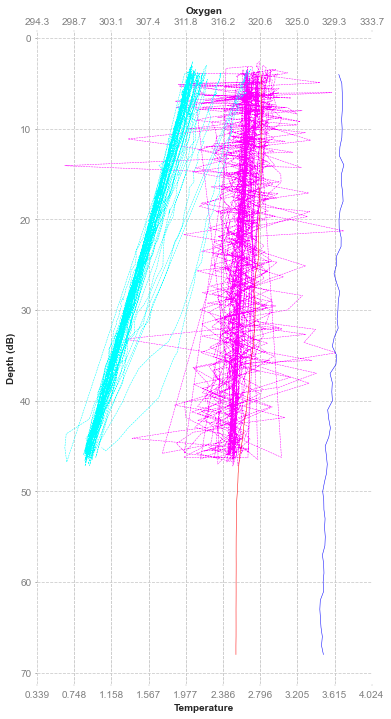

In [129]:
ctd_data = CTDProfilePlot()
plt,fig =ctd_data.plot2var(epic_key=['T_28','T2_35','O_65','CTDOXY_4221'],
                  xdata=[ctd_df.t090C,ctd_pd.SB_Temp,ctd_df['sbox0Mm/Kg'],ctd_pd.O2_corr_umkg],
                  ydata=[ctd_df.index,ctd_pd.SB_Depth],
                  secondary=True,
                  xlabel=['Temperature','Oxygen'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_TempOxy_CTDvPrawler_aand.png'))

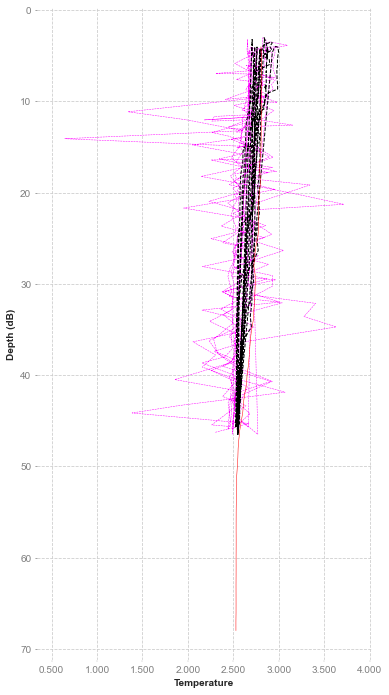

In [104]:
plt,fig =ctd_data.plot3var(epic_key=['T_28','T2_35',''],
                  xdata=[ctd_df.t090C,ctd_pd.SB_Temp,ctd_pd.Optode_Temp],
                  ydata=[ctd_df.index,ctd_pd.SB_Depth,ctd_pd.SB_Depth],
                  secondary=True,
                  xlabel=['Temperature'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_TempTemp_CTDvPrawler.png'))

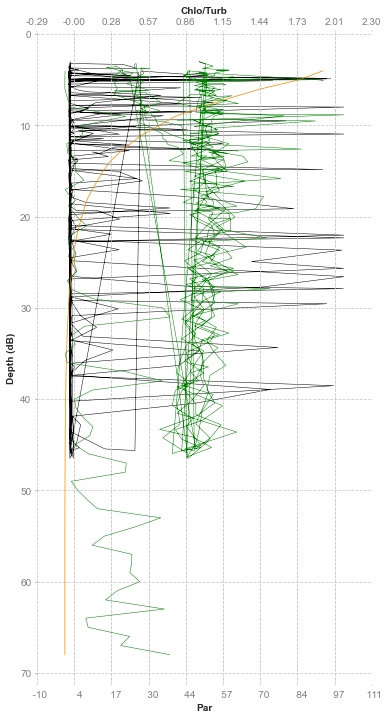

In [101]:
plt,fig =ctd_data.plot2var(epic_key=['PAR_905','Trb_980','Fch_906','Fch_906'],
                  xdata=[ctd_df.par,ctd_pd.TB,ctd_df['flECO-AFL'],ctd_pd.CH],
                  ydata=[ctd_df.index,ctd_pd.SB_Depth],
                  secondary=True,
                  xlabel=['Par','Chlo/Turb'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_ParChlorTurb.png'))

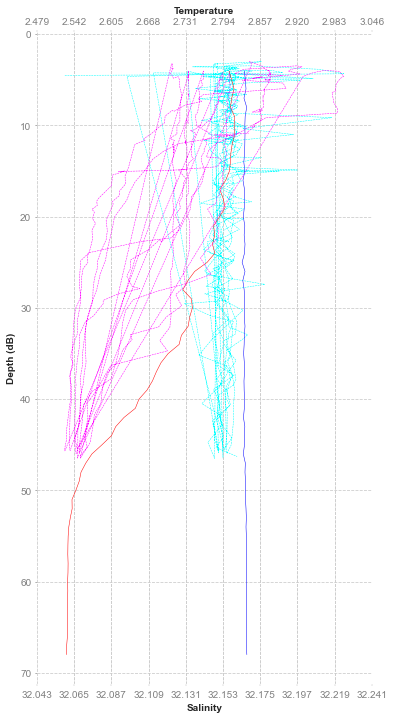

In [102]:
plt,fig =ctd_data.plot2var(epic_key=['S_41','S_42','T_28','T2_35'],
                  xdata=[ctd_df.sal00,ctd_pd.Sand,ctd_df.t090C,ctd_pd.Optode_Temp],
                  ydata=[ctd_df.index,ctd_pd.SB_Depth],
                  secondary=True,
                  xlabel=['Salinity','Temperature'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_TempSal_aand.png'))

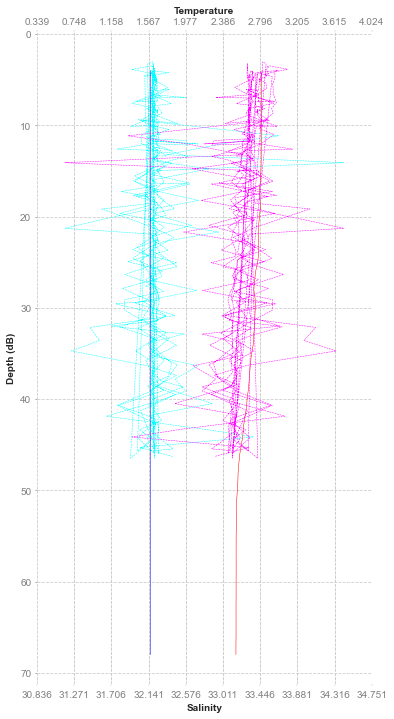

In [103]:
plt,fig =ctd_data.plot2var(epic_key=['S_41','S_42','T_28','T2_35'],
                  xdata=[ctd_df.sal00,ctd_pd.S,ctd_df.t090C,ctd_pd.SB_Temp],
                  ydata=[ctd_df.index,ctd_pd.SB_Depth],
                  secondary=True,
                  xlabel=['Salinity','Temperature'])

DefaultSize = fig.get_size_inches()
fig.set_size_inches( (DefaultSize[0], DefaultSize[1]*3) )
plt.savefig(f.split('/')[-1].replace('.cnv','_TempSal_sbe.png'))